**Grupo 03**

**Entrega 02 - Projeto**

Erik de Souza Bueno - 818113513

Guilherme Yoshikawa da Silva - 818133945

Luccas Samuel Martins Magalhães - 818141713

Matheus Novais Chiappa - 818234016


In [1]:
# Importando a base de dados do projeto 
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving census.csv to census.csv


In [4]:
# Instalando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn import tree # A árvore de decisão vem da bibliteca skearn
import graphviz # utilizado para a criação do modelo visual da árvore 
from sklearn.model_selection import cross_val_score

In [16]:
# carregando o dataset do projeto e mostrando o tamanho de células dele 
df = pd.read_csv('census.csv', sep=',')
len(df)

30162

In [17]:
# Mostando as primeiras 5 linhas do dataset
df.head()

,Unnamed: 0,age,workclass,final.weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loos,hour.per.week,native.country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
# Mostrando informaçoes sobre a base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  hour.per.week   30162 non-null  int64 
 11  income_bi       30162 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 2.8+ MB


In [19]:
# Criando uma nova coluna, mudando a coluna income para binária para melhor visualização
df['income_bi'] = df.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)

In [20]:
# Removendo algumas colunas que não contribuiram nesse caso
df = df.drop(['income','final.weight','capital.gain','capital.loos','native.country'], axis=1)

In [24]:
# Transferindo os dados com valor categorico para valores numéricos
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])

In [14]:
# Para mostrar os resultados até agora, foi mostrado as primeiras 30 linhas do dataset
df.head(30)

,Unnamed: 0,income_bi,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_48,age_49,age_50,age_51,age_52,age_53,age_54,...,native.country_ Columbia,native.country_ Cuba,native.country_ Dominican-Republic,native.country_ Ecuador,native.country_ El-Salvador,native.country_ England,native.country_ France,native.country_ Germany,native.country_ Greece,native.country_ Guatemala,native.country_ Haiti,native.country_ Holand-Netherlands,native.country_ Honduras,native.country_ Hong,native.country_ Hungary,native.country_ India,native.country_ Iran,native.country_ Ireland,native.country_ Italy,native.country_ Jamaica,native.country_ Japan,native.country_ Laos,native.country_ Mexico,native.country_ Nicaragua,native.country_ Outlying-US(Guam-USVI-etc),native.country_ Peru,native.country_ Philippines,native.country_ Poland,native.country_ Portugal,native.country_ Puerto-Rico,native.country_ Scotland,native.country_ South,native.country_ Taiwan,native.country_ Thailand,native.country_ Trinadad&Tobago,native.country_ United-States,native.country_ Vietnam,native.country_ Yugoslavia,income_ <=50K,income_ >50K
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
8,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [25]:
# Com um pouco mais de 30 mil filas, foi dividido o training set e o test set por 80/20

# Realizando o embaralhamento das filas
df = df.sample(frac=1)

In [27]:
# Dividindo os dados de training set e o test set
d_train = df[:25000] # training set
d_test = df[25000:] # test set

d_train_att = d_train.drop(['income_bi'], axis=1)
d_train_gt50 = d_train['income_bi']

d_test_att = d_test.drop(['income_bi'], axis=1)
d_test_gt50 = d_test['income_bi']

d_att = df.drop(['income_bi'], axis=1)
d_gt50 = df['income_bi']

In [28]:
# Printando a quantidade de dados quem tem o rendimento maior que 50k, comparando com o total
print("Income >50K: %d out of %d (%.2f%%)" % (np.sum(d_gt50), len(d_gt50), 100*float(np.sum(d_gt50)) / len(d_gt50)))

Income >50K: 7508 out of 30162 (24.89%)


In [29]:
# Classificando a árvore de decisão
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
t = t.fit(d_train_att, d_train_gt50)

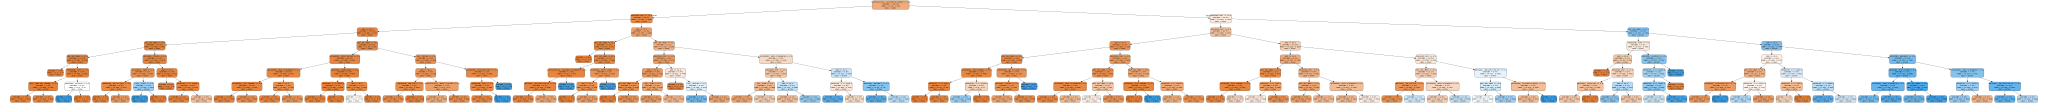

In [30]:
# Visualização da árvore de decisão com a base de dados do projeto, usando o graphviz tool
dot_data = tree.export_graphviz(t, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(d_train_att), class_names=['lt50K', 'gt50K'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [31]:
t.score(d_test_att, d_test_gt50)
# O resultado do modelo mostra um resultado de 82%, o que é um bom resultado

0.8231305695466873

In [32]:
scores = cross_val_score(t, d_att, d_gt50, cv=5)
# Mostra a pontuação média e +/- dois desvios padrão de distância (cobrindo 95% ou pontuação)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))
# Com uma precisão de 0.83 (+/- 0.00)

Accuracy: 0.83 (+/- 0.01)


In [42]:
# Preparando um modelo de previsão, guardando a primeira fila da moldura de dados depois de a termos modificado.
df.iloc[[0]].to_csv('prediction.csv', sep=',', encoding='utf-8', index=False)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 22805 to 29521
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Unnamed: 0                             30162 non-null  int64
 1   age                                    30162 non-null  int64
 2   education.num                          30162 non-null  int64
 3   hour.per.week                          30162 non-null  int64
 4   income_bi                              30162 non-null  int64
 5   workclass_ Federal-gov                 30162 non-null  uint8
 6   workclass_ Local-gov                   30162 non-null  uint8
 7   workclass_ Private                     30162 non-null  uint8
 8   workclass_ Self-emp-inc                30162 non-null  uint8
 9   workclass_ Self-emp-not-inc            30162 non-null  uint8
 10  workclass_ State-gov                   30162 non-null  uint8
 11  workclass_ Without-pay  

In [41]:
# O método certo é testar poucas profundidades a fim de encontrar a profundidade máxima certa para o modelo
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_gt50, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.75 (+/- 0.00)
Max depth: 2, Accuracy: 0.82 (+/- 0.01)
Max depth: 3, Accuracy: 0.82 (+/- 0.01)
Max depth: 4, Accuracy: 0.82 (+/- 0.01)
Max depth: 5, Accuracy: 0.82 (+/- 0.00)
Max depth: 6, Accuracy: 0.82 (+/- 0.01)
Max depth: 7, Accuracy: 0.83 (+/- 0.01)
Max depth: 8, Accuracy: 0.83 (+/- 0.01)
Max depth: 9, Accuracy: 0.83 (+/- 0.01)
Max depth: 10, Accuracy: 0.82 (+/- 0.01)
Max depth: 11, Accuracy: 0.82 (+/- 0.01)
Max depth: 12, Accuracy: 0.82 (+/- 0.01)
Max depth: 13, Accuracy: 0.81 (+/- 0.00)
Max depth: 14, Accuracy: 0.81 (+/- 0.00)
Max depth: 15, Accuracy: 0.81 (+/- 0.01)
Max depth: 16, Accuracy: 0.80 (+/- 0.01)
Max depth: 17, Accuracy: 0.80 (+/- 0.01)
Max depth: 18, Accuracy: 0.80 (+/- 0.01)
Max depth: 19, Accuracy: 0.80 (+/- 0.01)
